In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S2/Office_Amelie-S2.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (3576, 24, 1)
y_train.shape =  (3576,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
rnn_model.compile(optimizer=opt,loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
28/28 [==============================] - 1s 8ms/step - loss: 20.3458
Epoch 2/300
28/28 [==============================] - 0s 8ms/step - loss: 16.7159
Epoch 3/300
28/28 [==============================] - 0s 7ms/step - loss: 16.0453
Epoch 4/300
28/28 [==============================] - 0s 8ms/step - loss: 15.7777
Epoch 5/300
28/28 [==============================] - 0s 8ms/step - loss: 15.3667
Epoch 6/300
28/28 [==============================] - 0s 7ms/step - loss: 15.4809
Epoch 7/300
28/28 [==============================] - 0s 6ms/step - loss: 15.2389
Epoch 8/300
28/28 [==============================] - 0s 6ms/step - loss: 15.3971
Epoch 9/300
28/28 [==============================] - 0s 6ms/step - loss: 15.4332
Epoch 10/300
28/28 [==============================] - 0s 7ms/step - loss: 14.7274
Epoch 11/300
28/28 [==============================] - 0s 6ms/step - loss: 15.2687
Epoch 12/300
28/28 [==============================] - 0s 6ms/step - loss: 18.6601
Epoch 13/300
28/28 [=====

In [20]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [23]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [24]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 3.8234324189191127
Root Mean Squared Error for RNN Model for testing is: 16.727405476140877
Mean Absolute Error for RNN Model for training is: 2.293793375870792
Mean Absolute Error for RNN Model for testing is: 10.701196455188182
MAPE for RNN Model for training is: 0.11626515279494848
MAPE for RNN Model for testing is: 0.21743854477795835


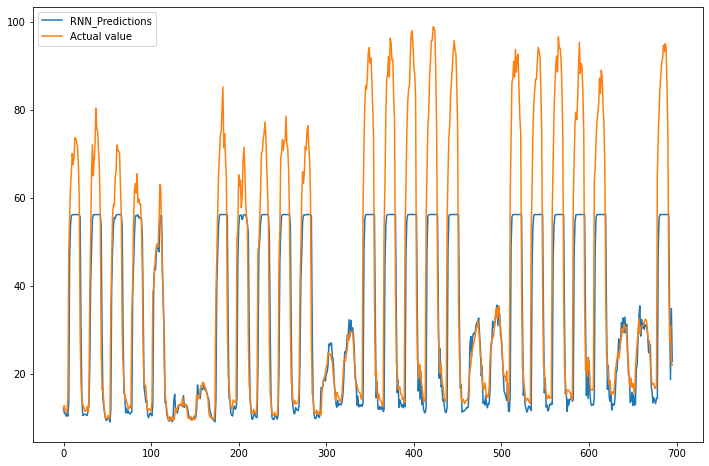

In [18]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([3.07500005]), array([2.591231], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([0.48376894]), array([0.04010415]), array([-0.23752809]), array([-1.04969323]), array([1.5118711]), array([1.41136146]), array([-0.13074017]), array([0.20477247]), array([0.69324112]), array([-0.12354469]), array([0.04615688]), array([-0.00233507]), array([0.11393499]), array([-0.23566961]), array([-0.27234554]), array([0.18903804]), array([0.38196397]), array([-0.28835583]), array([-0.23905802]), array([0.43753052]), array([1.10202122]), array([-0.54988313]), array([-0.44723558]), array([0.44079494]), array([-0.05001426]), array([-0.67076302]), array([-0.10979152]), array([-0.10083914]), array([0.24451303]), array([0.55403042]), array([1.3926909]), array([-0.54587603]), array([-0.19645739]), array([-0.42611599]), array([0.40825653]), array([0.54720116]), array([-0.89664769]), array([-0.26236725]), array([-0.03462934]), array([0.59534979]), array([0.50586152]), array([-1.00893521]), array([-0.32762456]), array([-0.41303897]), array([-0.10332584]), array([0.1335969]), array([0.53

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([1.75879645]), array([-1.6558907]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(413, 283)